<a href="https://colab.research.google.com/github/chirag20019/ML_Programs/blob/main/Lab07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-5-52d4f7ab49ea>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Target'] = (data_cleaned['Close'] > data_cleaned['Prev Close']).astype(int)


Confusion Matrix:
 [[210  48]
 [ 40 194]]

Accuracy: 0.8211382113821138

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.81      0.83       258
           1       0.80      0.83      0.82       234

    accuracy                           0.82       492
   macro avg       0.82      0.82      0.82       492
weighted avg       0.82      0.82      0.82       492



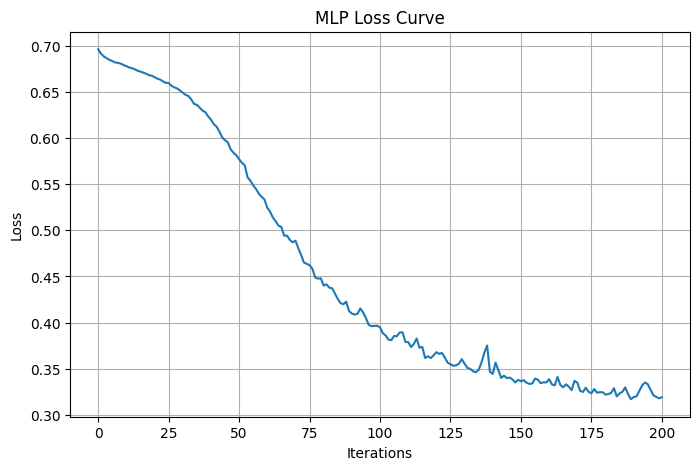

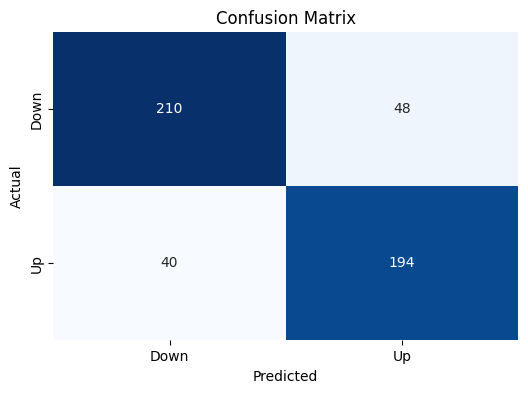

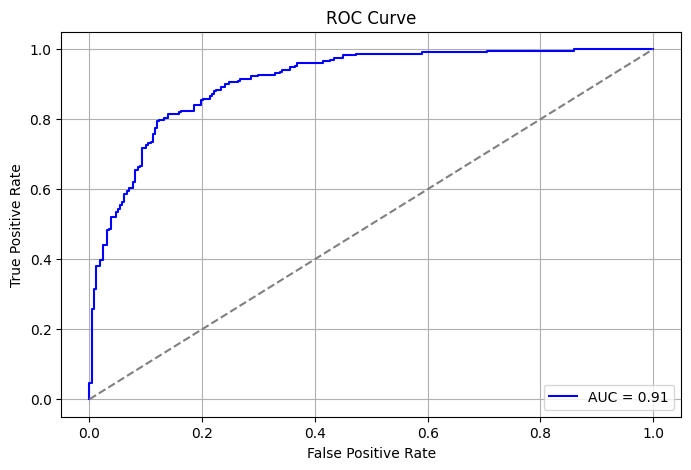

<ipython-input-5-52d4f7ab49ea>:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=features, palette='viridis')


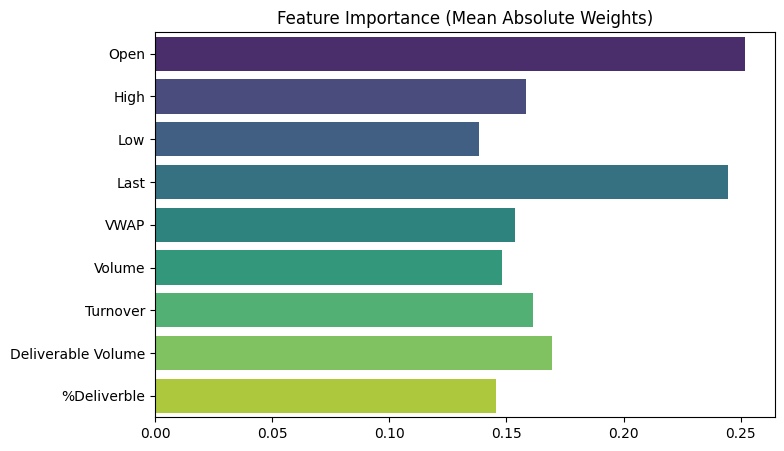

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
data = pd.read_csv('/content/Adaniports.csv')

# Drop any rows with missing values
data_cleaned = data.dropna()

# Create a classification target: 1 if Close > Prev Close, else 0
data_cleaned['Target'] = (data_cleaned['Close'] > data_cleaned['Prev Close']).astype(int)

# Select features for training
features = ['Open', 'High', 'Low', 'Last', 'VWAP', 'Volume', 'Turnover', 'Deliverable Volume', '%Deliverble']
X = data_cleaned[features]
y = data_cleaned['Target']

# Scale the feature values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build the MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, activation='relu', solver='adam', random_state=42)

# Train the model
mlp.fit(X_train, y_train)

# Predict on test data
y_pred = mlp.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("\nAccuracy:", accuracy)
print("\nClassification Report:\n", class_report)

# Plot the loss curve
plt.figure(figsize=(8, 5))
plt.plot(mlp.loss_curve_)
plt.title('MLP Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid()
plt.show()

# Plot confusion matrix heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
y_prob = mlp.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Feature importance (using absolute weights)
feature_importance = np.abs(mlp.coefs_[0]).mean(axis=1)

plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importance, y=features, palette='viridis')
plt.title('Feature Importance (Mean Absolute Weights)')
plt.show()
